In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets import dump_svmlight_file
from svm import *
from svmutil import *

In [2]:
# Loading the data

trainInput = np.loadtxt("trainInputBinary.csv")
trainTarget = np.loadtxt("trainTargetBinary.csv")
testInput = np.loadtxt("testInputBinary.csv")
testTarget = np.loadtxt("testTargetBinary.csv")

In [3]:
print('Train set shape: ', trainInput.shape); print('Train labels size: ', trainTarget.shape)
print('Test set shape: ', testInput.shape); print('Test labels size: ', testTarget.shape)

Train set shape:  (297, 186)
Train labels size:  (297,)
Test set shape:  (231, 186)
Test labels size:  (231,)


In [4]:
# Gaussian kernel: exp(−γ|x−z|2)

from statistics import median

x = trainInput
y = trainTarget

def distance(a,b):       
    return np.sqrt(np.sum((a-b)**2))

# Jaakkola’s heuristic to estimate a good starting value of gamma 
def jaakkola(x,y):
    distances = []
    for i in range(x.shape[0]):
        dist_min = 1
        for j in range(x.shape[0]):
            if y[i] != y[j]:
                dist = distance(x[i,:], x[j,:])
                if dist < dist_min:
                    dist_min = dist
        distances.append(dist_min)
    
    return median(distances), distances

sigma, d = jaakkola(x, y)

In [5]:
sigma

0.17792535549756786

In [6]:
# Converting the data to libsvm format
dump_svmlight_file(trainInput, trainTarget,'train.dat', zero_based=False, multilabel=False)
dump_svmlight_file(testInput, testTarget,'test.dat')

In [7]:
# Binary classiﬁcation using support vector machines with Libsvm library

y, x = svm_read_problem('train.dat')

# Hyperparameters C and gamma
c = [pow(10,i) for i in [-1,0,1,2,3]]
g = [round(sigma*pow(10,i), 4) for i in [-3,-2,-1,0,1,2,3]]

prob  = svm_problem(y, x)
param = svm_parameter()
best = 1
err = []

# Grid-search to determine the SVM hyperparameters γ and C, 
# using 5-fold cross validation and the classiﬁcation error 
for i in range(len(c)):
    for j in (range(len(g))):
        param.C = c[i]; param.G = g[j]; 
        model = svm_train(prob, param, '-v 5')
        p_label, p_acc, p_val = svm_predict(y, x, model)
        err.append(p_acc[1])
        # Mean squared error 
        mse = p_acc[1]
        if (mse < best):
            bestc = c[i]; bestg = g[j]; min_err = mse; best = mse; acc=p_acc[0]

print('C: ', bestc, 'gamma: ', bestg, 'MSE: ', round(min_err,3), 'Accuracy: ', round(acc,2))

Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 84.1751% (250/297) (classification)
Accuracy = 90

In [8]:
def run(y, x, model):
    p_label, p_acc, p_val = svm_predict(y, x, model)
    return p_label, p_acc, p_val

In [9]:
# Training with best pair C & gamma found

y_train, x_train = svm_read_problem('train.dat')
pb = svm_problem(y_train, x_train)
param = svm_parameter()
param.C=bestc; param.G=bestg
model = svm_train(pb, param)

labels, acc, vals = run(y_train, x_train, model)
print("MSE Train: ", round(acc[1], 3))

Accuracy = 98.3165% (292/297) (classification)
MSE Train:  0.017


In [10]:
# Model in Test

y_test, x_test = svm_read_problem('test.dat')
lab, ac, val= run(y_test, x_test, model)
print("MSE test: ", round(ac[1], 3))

Accuracy = 78.7879% (182/231) (classification)
MSE test:  0.212


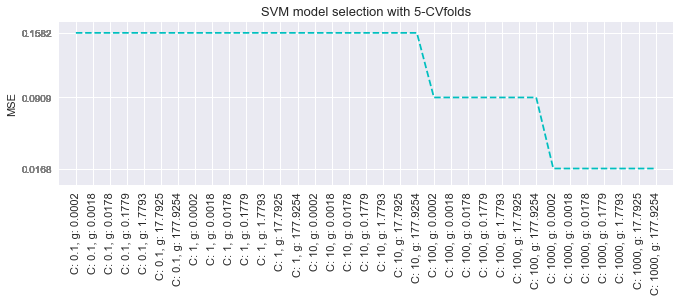

In [11]:
# Plot of model selection 

labels = ['C: ' + str(c[i]) + ', ' + 'g: ' + str(g[j]) for i in range(len(c)) for j in range(len(g))]
x = list(range(1, len(c)*len(g)+1))

style.use('seaborn')
plt.figure(figsize=(11, 3))
plt.xticks(x, labels, rotation='vertical', fontsize=11)
plt.yticks(err, color='grey')
plt.ylabel("MSE", fontsize=11)
plt.plot(x, err, '--', c='c')
plt.title('SVM model selection with 5-CVfolds', fontsize=13)
plt.xlim([0, 36])
plt.ylim([0, 0.17])
plt.show();